#Objective: Prediction task is to determine whether a person makes over 50K a year.

**Adult Income DataSet Description**
*****************************************************
**A). Number of Instances :-**
   48842 instances, mix of continuous and discrete
*****************************************************

**B). Number of Attributes :-**
   6 continuous, 8 nominal attributes.
*****************************************************

**C). Attribute Information:**

    1) age: continuous.
    2) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    3) fnlwgt: continuous.
    4) education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    5) education-num: continuous.
    6) marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    7) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    8) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    9) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    10)sex: Female, Male.
    11)capital-gain: continuous.
    12)capital-loss: continuous.
    13)hours-per-week: continuous.
    14)native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    15)class: >50K, <=50K

*****************************************************
**D. Missing Attribute Values:**
   7% have missing values


#Step-1 : Import the required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Step-2: Read the adult income dataset

In [18]:
data=pd.read_csv("adult_income_dataset.csv")

#Step-3: Exploratory Data Analytics

In [7]:
print("data.shape = ", data.shape)

data.shape =  (9615, 15)


In [ ]:
print("Info about dataset\n", data.info() )

In [ ]:
#print first 10 rows of dataset
print("First 10 rows : \n")
data.head(10)

In [ ]:
print("data.describe() = \n" )
data.describe()

In [ ]:
print("data.describe(include='object') = \n" )
data.describe(include='object')

In [ ]:
print("data.income.unique() = \n" )
data.income.unique()

In [ ]:
#data.income=data.income.replace(['<=50K', '>50K'],[0,1])
sns.countplot(data=data, x="income")
plt.show()

#Feature Analysis and Vizualization

##Vizualization-01: Income vs Age

In [21]:
print("data.age.unique() = \n", data.age.unique())

data.age.unique() = 
 [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89]


In [ ]:
#sns.boxplot(data.income, data.age)
sns.boxplot(x="income", y="age", data=data)
plt.show()

##Vizualization-02:  Income vs fnlwgt

In [ ]:
#sns.boxplot(data.income,data['fnlwgt'])
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()

##Vizualization-03:  Income vs educational-num

In [ ]:
#sns.boxplot(data.income,data['educational-num'])
sns.boxplot(x="income", y="educational-num", data=data)
plt.show()

##Vizualization-04:  Income vs capital-gain

In [ ]:
#sns.boxplot(data.income,data['capital-gain'])
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()

##Vizualization-05:  Income vs capital-loss

In [ ]:
#sns.boxplot(data.income,data['capital-loss'])
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

##Vizualization-06:  Income vs capital-loss

In [ ]:
#sns.boxplot(data.income,data['capital-loss'])
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

##Vizualization-07:  Income vs hours-per-week

In [ ]:
#sns.boxplot(data.income,data['hours-per-week'])
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

##Print the details for missing values

In [ ]:
data.isnull().sum()

##Remove the missing values if any

In [31]:
data=data.dropna()

##Replace the income class with numeric values


In [30]:
#a) Replace "<=50K" with  0
#b) Replace ">50K"  with  1

data.income=data.income.replace(['<=50K', '>50K'],[0,1])

##Vizualization-08: Print correlation matrix via heatmap

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

##Vizualization-09: workclass vs income

In [33]:
#print unique values in the column "workclass"
print("data.workclass.unique() = \n", data.workclass.unique() )

data.workclass.unique() = 
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="workclass", hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-10: education vs income

In [ ]:
#print unique values in the column "education"
print("data.education.unique() =\n",  data.education.unique() )

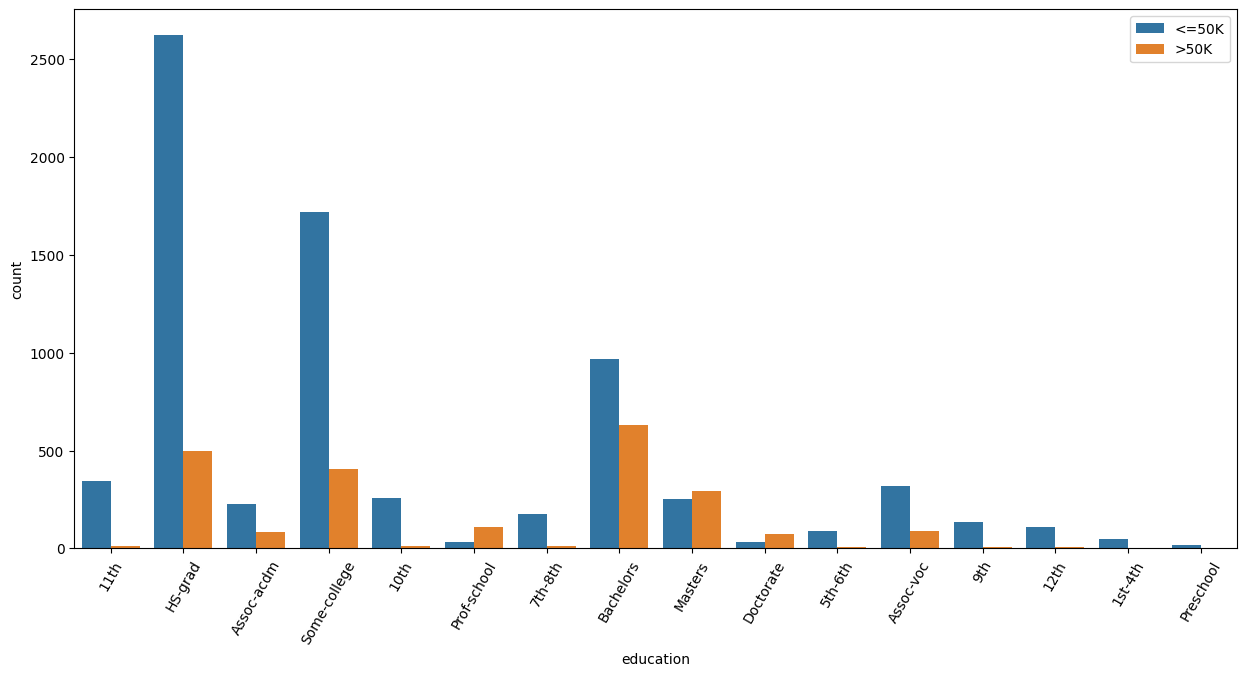

In [38]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="education", hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-11: marital-status vs income

In [39]:
#print unique values in the column "marital-status"
print("data['marital-status'].unique() =\n",  data['marital-status'].unique() )

data['marital-status'].unique() =
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x = data['marital-status'], hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-12: occupation vs income

In [ ]:
#print unique values in the column "occupation"
print("data.occupation.unique() =\n",  data.occupation.unique() )

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="occupation", hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-13: relationship vs income

In [ ]:
#print unique values in the column "relationship"
print("data.relationship.unique() =\n")
print(data.relationship.unique())

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="relationship", hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-14: gender vs income

In [48]:
#print unique values in the column "gender"
print("data.gender.unique() =\n",  data.gender.unique() )

data.gender.unique() =
 ['Male' 'Female']


In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="gender", hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-15: native-country vs income

In [50]:
#print unique values in the column "native-country"
print("data['native-country'].unique() =\n",  data['native-country'].unique())

data['native-country'].unique() =
 ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France']


In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x='native-country', hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

##Data Preprocessing

In [53]:
#Split the data in x and y

x=data.drop(['income'],axis=1)
y=data.income

In [ ]:
#print first 10 rows of x
x.head(10)

##Categorical data will converted into OneHotEncoding format

In [55]:
x=pd.get_dummies(x)

In [ ]:
#Print the data after conversioon into OneHotEncoding
x.head(10)

##print the list of column names havin numerical values

In [57]:
numericalcols=list(data.select_dtypes(exclude='object').columns)
print( "numericalcols = ", numericalcols)

numericalcols =  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


##To remove the last income column name from the list

In [58]:
numericalcols.pop()
print( "numericalcols = ", numericalcols)

numericalcols =  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


##Standardized the values of  numerical columns

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[numericalcols]=scaler.fit_transform(x[numericalcols])

In [ ]:
print("After StandardScaler: x.head() = \n")
x.head()

##Data Splitting into 70% of training data and 30% of testing data

In [61]:
x_train,x_test,y_trian,y_test=train_test_split(x,y,random_state=7,test_size=0.3)

##Train the model-01: LogisticRegression Algoritmns

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_trian)

###First Method to print the accuracy of LogisticRegression Algorithm

In [65]:

accuracy_result =  model.score(x_test,y_test)
print("Accuracy of LogisticRegression : ",  accuracy_result )

Accuracy of LogisticRegression :  0.8481802426343155


###Second Method to print the accuracy of LogisticRegression Algorithm

In [64]:
y_predictL=model.predict(x_test)
accuracy_result = accuracy_score(y_test,y_predictL)
print("Accuracy of LogisticRegression : ",  accuracy_result )

Accuracy of LogisticRegression :  0.8481802426343155


###Vizualization-16: Performance of LogisticRegression

In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predictL,hist=False,label='Predicted Values')
ax.set_title('LogisticRegression')
plt.legend()
plt.show()

###Print the confusion_matrix for prediction accuracy of LogicsticRegression

In [67]:
matrix = confusion_matrix(y_test,y_predictL)
print("confusion_matrix for prediction accuracy of LogicsticRegression = \n")
matrix

confusion_matrix for prediction accuracy of LogicsticRegression = 



array([[2066,  149],
       [ 289,  381]])

###Vizualization-17: heatmap of confusion_matrix for LogicsticRegression

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predictL), annot=True, cmap='Blues')
plt.show()

##Train the model-02: SupportVectorClassifier Algoritmns

In [69]:
model=SVC()
model.fit(x_train,y_trian)

SVC()

###First Method to print the accuracy of SupportVectorClassifier Algorithm

In [70]:
accuracy_result =  model.score(x_test,y_test)
print("Accuracy of SupportVectorClassifier : ",  accuracy_result )

Accuracy of SupportVectorClassifier :  0.848526863084922


###Second Method to print the accuracy of SupportVectorClassifier Algorithm

In [71]:
y_predicS=model.predict(x_test)
accuracy_result = accuracy_score(y_test,y_predicS)
print("Accuracy of SupportVectorClassifier : ",  accuracy_result )

Accuracy of SupportVectorClassifier :  0.848526863084922


###Vizualization-18: Performance of SupportVectorClassifier

<ipython-input-72-8a52d347e00a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,label='Actual Values')
<ipython-input-72-8a52d347e00a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_predicS,hist=False,label='Predicted Values')


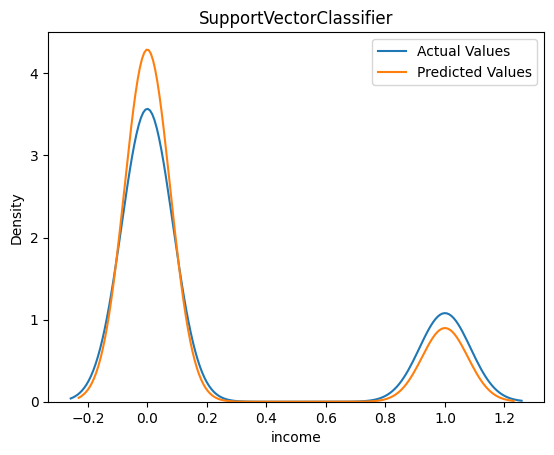

In [72]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predicS,hist=False,label='Predicted Values')
ax.set_title('SupportVectorClassifier')
plt.legend()
plt.show()

###Print the confusion_matrix for prediction accuracy of SupportVectorClassifier

In [73]:
matrix = confusion_matrix(y_test,y_predictL)
print("confusion_matrix for prediction accuracy of SupportVectorClassifier = \n")
print(matrix)

confusion_matrix for prediction accuracy of SupportVectorClassifier = 

[[2066  149]
 [ 289  381]]


###Vizualization-19: heatmap of confusion_matrix for SupportVectorClassifier

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predicS),annot=True,cmap='Blues')
plt.show()